In [29]:
using LinearAlgebra
using Plots
using Pkg
Pkg.add("Plots")
Pkg.add("GR")


   Resolving package versions...
  No Changes to `C:\Users\mathe\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\mathe\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\mathe\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\mathe\.julia\environments\v1.10\Manifest.toml`


In [30]:
n=3
E,=qr(randn(n,n))
E1=E[:,1:2]
E2=E[:,3:end]
F,=qr(randn(n,n))
F1=F[:,1:2]
F2=F[:,3:end]

3×1 Matrix{Float64}:
  0.3460725461601514
 -0.3586453741118897
  0.8669528755488227

In [31]:
function plot_matrix_as_plane(A; grid_size=10)
    # Extrair os dois vetores coluna da matriz
    v1 = A[:, 1]
    v2 = A[:, 2]

    # Gerar uma grade de pontos no plano
    u = range(-1, 1, length=grid_size)
    v = range(-1, 1, length=grid_size)
    X = [v1[1] * ui + v2[1] * vi for ui in u, vi in v]
    Y = [v1[2] * ui + v2[2] * vi for ui in u, vi in v]
    Z = [v1[3] * ui + v2[3] * vi for ui in u, vi in v]

    # Definir os ticks manualmente
    xticks = range(minimum(X), maximum(X), length=5)  # 5 ticks no eixo x
    yticks = range(minimum(Y), maximum(Y), length=5)  # 5 ticks no eixo y
    zticks = range(minimum(Z), maximum(Z), length=5)  # 5 ticks no eixo z

    # Plotar a superfície
    surface(X, Y, Z, color=:blue, alpha=0.5, legend=false,
            xticks=xticks, yticks=yticks, zticks=zticks)
    xlabel!("X")
    ylabel!("Y")
    zlabel!("Z")
    title!("Plano definido pela matriz 3x2")
end

plot_matrix_as_plane (generic function with 1 method)

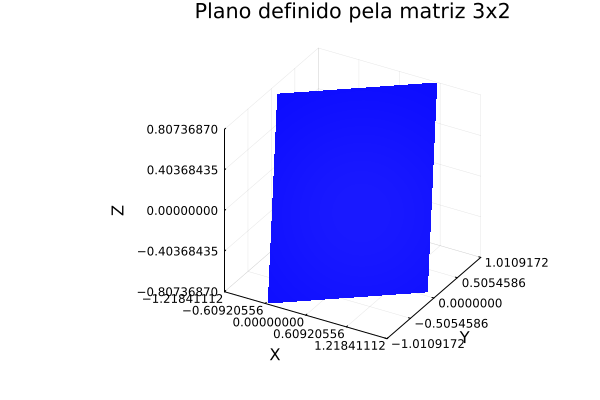

In [32]:
plot_matrix_as_plane(E1)

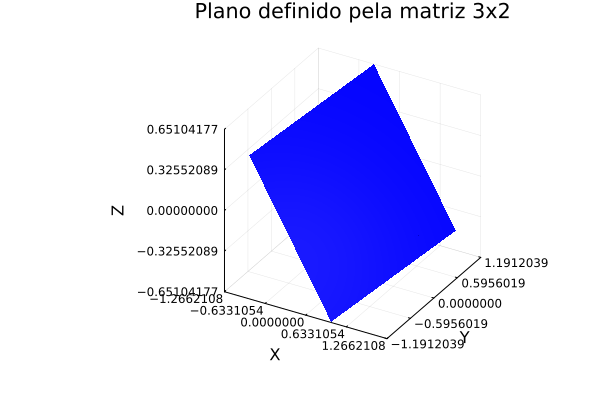

In [33]:
plot_matrix_as_plane(F1)

In [34]:
U1,S11,V1=svd(E1'*F1,full=true)
temp,S12,V2=svd(E1'*F2,full=true)
U2,S22,V2=svd(E2'*F2,full=true)
D=[U1'*E1'*F1*V1 U1'*E1'*F2*V2
 U2'*E2'*F1*V1 U2'*E2'*F2*V2]
U=[U1 zeros(2,n-2)
 zeros(n-2,2) U2]
W=E*U*D*U'*E'

3×3 Matrix{Float64}:
 0.990335   -0.121856  -0.06624
 0.137713    0.920689   0.365194
 0.0164854  -0.370787   0.928572

 [C -S\
  S  C\
  0  0  I]

In [35]:
D

3×3 Matrix{Float64}:
  1.0          1.66533e-16   8.5704e-16
  1.11022e-16  0.919798     -0.392392
 -9.73369e-16  0.392392      0.919798

In [37]:
norm(E*U*D*U'*E'*E1-F1)

1.318441197894131

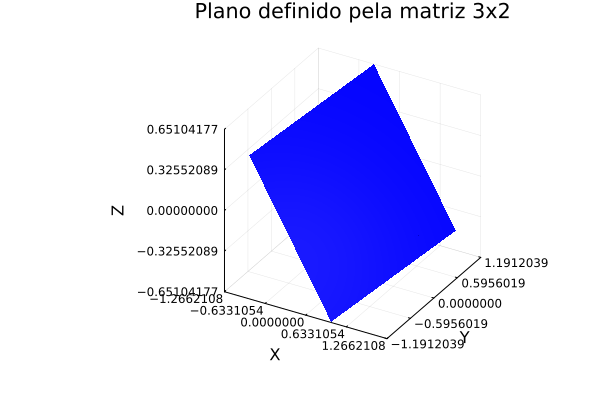

In [38]:
plot_matrix_as_plane(W*E1*U1*V1')

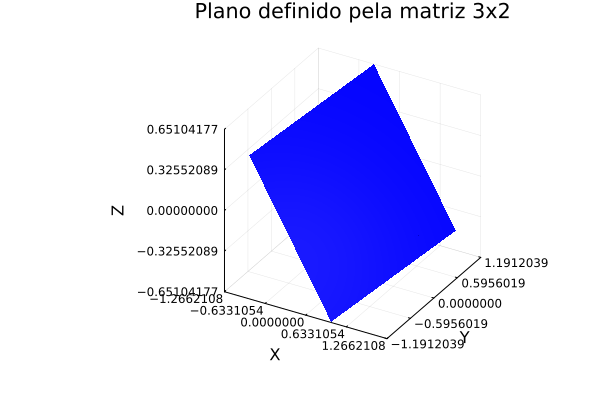

In [39]:
plot_matrix_as_plane(F1)

In [40]:
norm(W*E1*U1-F1)

1.9999999999999984

In [41]:
norm(W*E1*U1*V1'-F1)

1.4209662042763643e-15

In [42]:
norm(D'*D-(1* Matrix(I, n, n)))

1.0483762764184703e-15

In [43]:
norm(W'*W-(1* Matrix(I, n, n)))

2.752429494446136e-15

In [44]:
rotated=W*E1*U1
norm(rotated-F1*V1)

1.5009879699738906e-15

In [45]:
function draw(M)
    x=M[:,1]
    y=M[:,2]
    z=x+im*y
    e=z.^2
    #print(norm(e[1]+e[2]+e[3]),"\n")
    #print(norm(e[1])+norm(e[2])+norm(e[3]))
    E=[real(e)' ; imag(e)']
    points=[zeros(2,1) E[:,1] E[:,1] E[:,1]+E[:,2] E[:,1]+E[:,2] E[:,1]+E[:,2]+E[:,3] E[:,1]+E[:,2]+E[:,3]]
    return points
end

draw (generic function with 1 method)

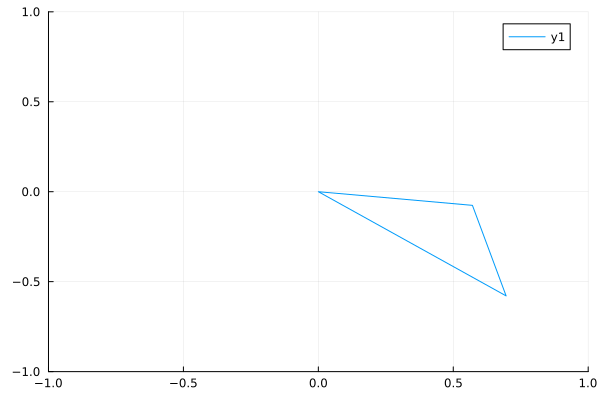

In [46]:
points=draw(E1)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

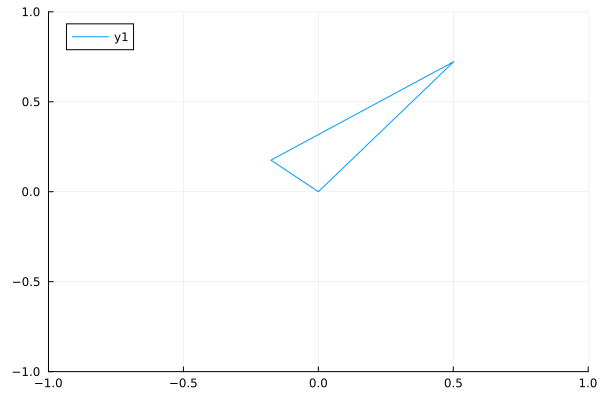

In [47]:
points=draw(F1)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

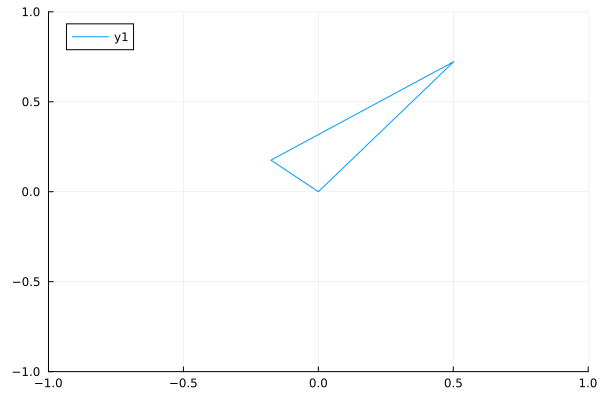

In [48]:
points1=draw(W*E1*U1*V1')
plot(points1[1,:],points1[2,:],xlim=[-1,1], ylim=[-1,1])